In [61]:
import pickle
import numpy as np

In [62]:
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [63]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [64]:
embeddings = np.array(x)

In [74]:
def cosine_similarity(v1, v2):
    """Calculate the cosine similarity between two vectors."""
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def compute_centroid(vectors):
    """Compute the centroid of a set of vectors using cosine similarity."""
    # Sum all vectors
    sum_vector = np.sum(vectors, axis=0)
    
    # Normalize the sum vector to unit length
    centroid = sum_vector / np.linalg.norm(sum_vector)    

    return centroid

# Example usage
# vectors = np.array([...])  # Replace with your array of vectors
# centroid = compute_centroid(vectors)
# print("Centroid:", centroid)


In [75]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(compute_centroid(embeddings[y == i]))
    labels.append(i)

# print(len(centroids))
# print(centroids)

100
[array([0.05762349, 0.05491924, 0.05427751, 0.05448647, 0.05238845,
       0.05492073, 0.04621564, 0.0537989 , 0.05686219, 0.05161441,
       0.06057072, 0.05452527, 0.05981461, 0.05033535, 0.05365259,
       0.053526  , 0.05714583, 0.05354274, 0.05259798, 0.05174633,
       0.05244873, 0.05559369, 0.05379251, 0.0538992 , 0.05374661,
       0.05427693, 0.05588781, 0.05763672, 0.05396996, 0.05339681,
       0.05732438, 0.05419328, 0.05387184, 0.05818414, 0.04799436,
       0.05128551, 0.05343171, 0.05368027, 0.05641176, 0.05381513,
       0.05339468, 0.05247371, 0.05389444, 0.0549315 , 0.05430027,
       0.05650092, 0.05476541, 0.05312093, 0.05436441, 0.05309793,
       0.05079552, 0.05741202, 0.04907992, 0.04668175, 0.0547846 ,
       0.06293574, 0.05374927, 0.05360957, 0.05328538, 0.05462048,
       0.05368254, 0.05266272, 0.0541056 , 0.05246895, 0.05060166,
       0.05227944, 0.04861922, 0.0538919 , 0.05400803, 0.05704583,
       0.05343371, 0.05598318, 0.06012658, 0.05500303, 0.

In [76]:

clusters = {}
parents = {}
curr_points = np.array(centroids.copy())
curr_labels = labels.copy()

for i in range(10):

    # calculate cosine distance

    distances = np.dot(curr_points, curr_points[i])    

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances.dtype)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = curr_points[sorted_distances.astype(int)[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted int64
[52 48 68 90 76 13 81 49  6 85]
(90, 344)
sorted int64
[17 60 23 71  0 61 31 59 15 16]
(80, 344)
sorted int64
[53 99  5 20 45 26 83 78 58 47]
(70, 344)
sorted int64
[54 69  9 41 28 70 94 92 86 98]
(60, 344)
sorted int64
[95 30 12 73 35 46 11 39 96 19]
(50, 344)
sorted int64
[62 21 56 18 87 24 51 67 74 82]
(40, 344)
sorted int64
[33 27 38 89 44 43 80 37  8 42]
(30, 344)
sorted int64
[36  1 63  4 75  2 34 57 50  3]
(20, 344)
sorted int64
[84 22 10 40 88 14 25  7 79 91]
(10, 344)
sorted int64
[77 93 32 29 72 55 65 64 66 97]
(0, 344)


In [77]:
print(parents)

{0: array([52, 48, 68, 90, 76, 13, 81, 49,  6, 85]), 1: array([17, 60, 23, 71,  0, 61, 31, 59, 15, 16]), 2: array([53, 99,  5, 20, 45, 26, 83, 78, 58, 47]), 3: array([54, 69,  9, 41, 28, 70, 94, 92, 86, 98]), 4: array([95, 30, 12, 73, 35, 46, 11, 39, 96, 19]), 5: array([62, 21, 56, 18, 87, 24, 51, 67, 74, 82]), 6: array([33, 27, 38, 89, 44, 43, 80, 37,  8, 42]), 7: array([36,  1, 63,  4, 75,  2, 34, 57, 50,  3]), 8: array([84, 22, 10, 40, 88, 14, 25,  7, 79, 91]), 9: array([77, 93, 32, 29, 72, 55, 65, 64, 66, 97])}


In [78]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{52: 0, 48: 0, 68: 0, 90: 0, 76: 0, 13: 0, 81: 0, 49: 0, 6: 0, 85: 0, 17: 1, 60: 1, 23: 1, 71: 1, 0: 1, 61: 1, 31: 1, 59: 1, 15: 1, 16: 1, 53: 2, 99: 2, 5: 2, 20: 2, 45: 2, 26: 2, 83: 2, 78: 2, 58: 2, 47: 2, 54: 3, 69: 3, 9: 3, 41: 3, 28: 3, 70: 3, 94: 3, 92: 3, 86: 3, 98: 3, 95: 4, 30: 4, 12: 4, 73: 4, 35: 4, 46: 4, 11: 4, 39: 4, 96: 4, 19: 4, 62: 5, 21: 5, 56: 5, 18: 5, 87: 5, 24: 5, 51: 5, 67: 5, 74: 5, 82: 5, 33: 6, 27: 6, 38: 6, 89: 6, 44: 6, 43: 6, 80: 6, 37: 6, 8: 6, 42: 6, 36: 7, 1: 7, 63: 7, 4: 7, 75: 7, 2: 7, 34: 7, 57: 7, 50: 7, 3: 7, 84: 8, 22: 8, 10: 8, 40: 8, 88: 8, 14: 8, 25: 8, 7: 8, 79: 8, 91: 8, 77: 9, 93: 9, 32: 9, 29: 9, 72: 9, 55: 9, 65: 9, 64: 9, 66: 9, 97: 9}


In [81]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(embeddings):
    distances = []
    for j in centroids:
        distances.append(cosine_similarity(x, j))
    first_index = np.argsort(distances)[0]    
    a[reverse[first_index]][y[i]] += 1

    

In [82]:
print(y.shape)
print(np.max(y))

(49984,)
99


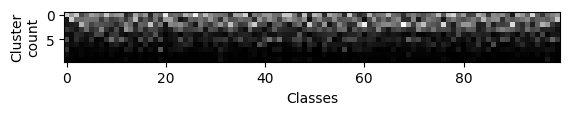

In [83]:
import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

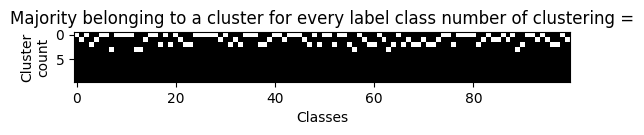

In [84]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [85]:
np.sum(c, axis=1)

array([47., 21., 26.,  6.,  0.,  0.,  0.,  0.,  0.,  0.])

In [86]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/y.shape[0])

0.6707146286811779


In [53]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x_test = data["outputs"].cpu().numpy()
y_test = data["labels"].cpu().numpy()
print(x_test.shape)
print(y_test.shape)

print(y_test[:30])

(10000, 344)
(10000,)
[17 75 46  0 96 27 65 13 87 68  4 13  2 32 85 23 71 63 50 41 32 17 97 32
 95 26 61 62 51  1]


In [54]:
# for each embedding fint the closest centroid
embeddings_test = np.array((x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test)))

In [55]:
# for each embedding fint the closest centroid

at = np.zeros((10,100))

for i, x in enumerate(embeddings_test):     
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]        
    at[reverse[first_index]][y_test[i]] += 1

In [56]:
print(y_test[:20])

[17 75 46  0 96 27 65 13 87 68  4 13  2 32 85 23 71 63 50 41]


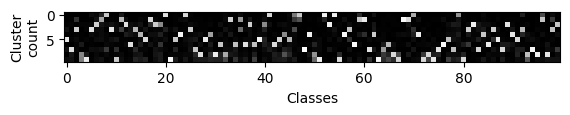

In [57]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(at,cmap='Greys_r')

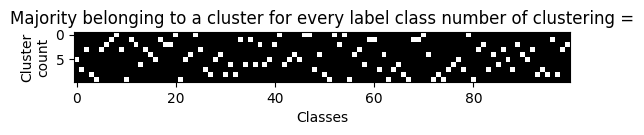

In [58]:
## majority voting for each class
bt = np.argmax(at, axis=0)

ct = np.zeros((10,100))
for x in range(100):    
    ct[bt[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(ct, cmap='Greys_r')

In [59]:
np.sum(ct, axis=1)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [60]:
false_negative = np.ma.array(at,mask=ct)
sum_fn = np.sum(false_negative)
print(sum_fn/y_test.shape[0])

0.276
